# Machine Learning Engineer Nanodegree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, json
import re, string, unicodedata
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer
#nltk.download('wordnet')
%matplotlib inline

In [17]:
path_to_json_PR = "DataFiles/eng_positive/"
path_to_json_NR = "DataFileseng_negative/"

In [18]:
PR_json = [pos_json for pos_json in os.listdir(path_to_json_PR) if pos_json.endswith('.json')]
NR_json = [neg_json for neg_json in os.listdir(path_to_json_NR) if neg_json.endswith('.json')]

In [19]:
jsons_data_PR = pd.DataFrame(columns=['text'])
jsons_data_NR = pd.DataFrame(columns=['text'])

In [20]:
for index, js in enumerate(PR_json):
    with open(os.path.join(path_to_json_PR, js),encoding="utf8") as json_file:
        json_text = json.load(json_file)
        text = json_text['text']

        jsons_data_PR.loc[index] = [text]

jsons_data_PR['reviews'] = 1

In [21]:
for index, js in enumerate(NR_json):
    with open(os.path.join(path_to_json_NR, js),encoding="utf8") as json_file:
        json_text = json.load(json_file)
        text = json_text['text']

        jsons_data_NR.loc[index] = [text]
        
jsons_data_NR['reviews'] = 0

In [189]:
print("Positive Reviews", jsons_data_PR.shape[0])
print("Negative Reviews", jsons_data_NR.shape[0])

Positive Reviews 32470
Negative Reviews 7256


In [2]:
df_reviews = pd.DataFrame.append(jsons_data_PR,jsons_data_NR,ignore_index=True)
print(df_reviews.shape)
df_reviews.head()

(39726, 2)


,text,reviews
0,Planet of the Vapes had what i was looking for...,1
1,"I love the bras, just make sure you know your ...",1
2,"Shipping was super fast, literally within hour...",1
3,I have ordered many times from Doheny. I alway...,1
4,"The orders I placed were just as expected, and...",1


### Data Preprocessing

In [3]:
## Functions Required for Preprocessing

def strip_html_tags(text):
    stripped_text = re.sub('[^\w\s]',' ', text)
    stripped_text = re.sub(r'\n', ' ', text)
    stripped_text = stripped_text.strip(" ")
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


additional_stop_words = ["i","movie","zz","aa","film","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself",\
             "yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their",\
             "theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be",\
             "been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because",\
             "as","until","while","of","at","by","for","with","about","against","between","into","through","during","before",\
             "after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once",\
             "here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no",\
             "nor","not","only","own","same","so","than","too","very","s","t","can","will","just","I","should","now","d","ll","m",\
             "o","re","ve","y","ain","aren","couldn","didn","doesn","hadn","hasn","haven","isn","ma","mightn","mustn","needn","shan",\
             "shouldn","wasn","weren","won","wouldn"]

In [4]:
r_html = lambda x: strip_html_tags(x)
df_reviews_clean = pd.DataFrame(df_reviews.text.apply(r_html))

In [5]:
r_accented = lambda x: remove_accented_chars(x)
df_reviews_clean = pd.DataFrame(df_reviews_clean.text.apply(r_accented))

In [6]:
r_special = lambda x: remove_special_characters(x, remove_digits = True)
df_reviews_clean = pd.DataFrame(df_reviews_clean.text.apply(r_special))

In [7]:
df_reviews_clean['reviews'] = df_reviews['reviews']
print(df_reviews_clean.shape)
df_reviews_clean.head()

(39726, 2)


,text,reviews
0,Planet of the Vapes had what i was looking for...,1
1,I love the bras just make sure you know your m...,1
2,Shipping was super fast literally within hours...,1
3,I have ordered many times from Doheny I always...,1
4,The orders I placed were just as expected and ...,1


### Data Exploration

Review length: 
Mean 199.56 words (median - 108.000000)


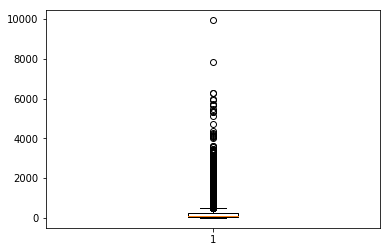

In [18]:
# Summarize review length
print("Review length: ")
result = [len(review) for review in df_reviews_clean.text]
print("Mean %.2f words (median - %f)" % (np.mean(result), np.median(result)))
# plot review length
plt.boxplot(result)
plt.show()

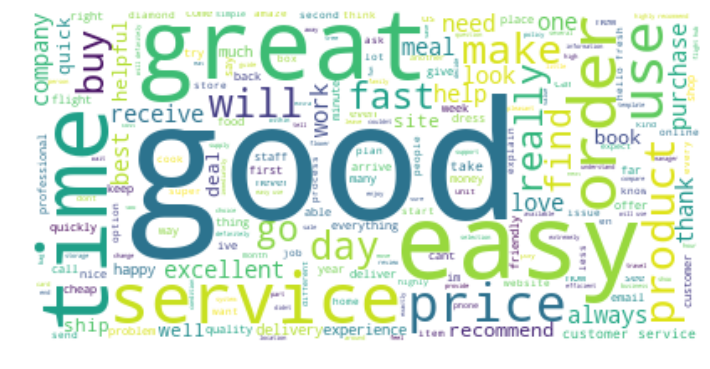

In [51]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

def generate_wordcloud(no_reviews = 500, title = None):
    wordcloud_text = ''.join([review for review in df_reviews_clean.text[:no_reviews]])
    wordcloud = WordCloud(relative_scaling = 1.0,
                          background_color='white',
                          max_words=200,
                          max_font_size=100,                          
                          stopwords = STOPWORDS # set or space-separated string
                          ).generate(wordcloud_text)
    
    fig = plt.figure(1, figsize=(12,18))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
        
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

generate_wordcloud(no_reviews = 500)

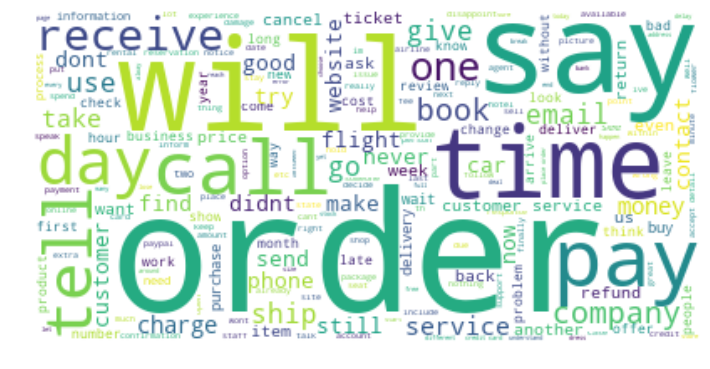

In [57]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

def generate_wordcloud(no_reviews = -500, title = None):
    wordcloud_text = ''.join([review for review in df_reviews_clean.text[no_reviews:]])
    wordcloud = WordCloud(relative_scaling = 1.0,
                          background_color='white',
                          max_words=200,
                          max_font_size=100,                          
                          stopwords = STOPWORDS # set or space-separated string
                          ).generate(wordcloud_text)
    
    fig = plt.figure(1, figsize=(12,18))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
        
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

generate_wordcloud(no_reviews = -500)

In [14]:
from collections import Counter
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

stemmer = PorterStemmer()

def cleanup_text(docs):
    texts = []
    for doc in docs:
        doc = word_tokenize(doc)
        tokens = [tok.lower().strip() for tok in doc]
        tokens = [stemmer.stem(tok) for tok in tokens if tok not in stop_words]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

pos_review = [text for text in df_reviews_clean[df_reviews_clean['reviews'] == 1]['text']]
pos_review = cleanup_text(pos_review)
pos_review = ' '.join(pos_review).split()


# Count all unique words
pos_counts = Counter(pos_review)
# get words and word counts
pos_common_words = [word[0] for word in pos_counts.most_common(20)]
pos_common_counts = [word[1] for word in pos_counts.most_common(20)]

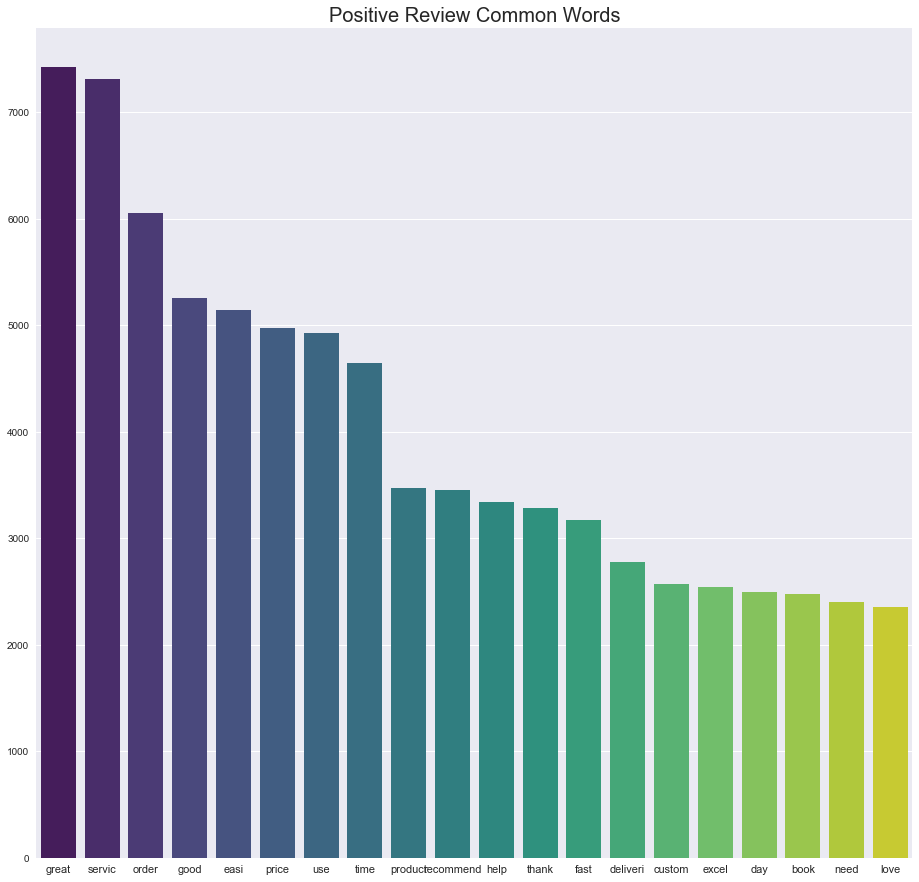

In [16]:
# plot 20 most common words in positive reviews
sns.barplot(pos_common_words, pos_common_counts, palette='viridis')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Positive Review Common Words', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=11)
#fig.savefig('positive_words.png')
sns.set(rc={'figure.figsize':(15.7,15.27)})
plt.show()

In [17]:
from collections import Counter
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

def cleanup_text(docs):
    texts = []
    for doc in docs:
        doc = word_tokenize(doc)
        tokens = [tok.lower().strip() for tok in doc]
        tokens = [stemmer.stem(tok) for tok in tokens if tok not in stop_words]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

neg_review = [text for text in df_reviews_clean[df_reviews_clean['reviews'] == 0]['text']]
neg_review = cleanup_text(neg_review)
neg_review = ' '.join(neg_review).split()


# Count all unique words
neg_counts = Counter(neg_review)
# get words and word counts
neg_common_words = [word[0] for word in neg_counts.most_common(20)]
neg_common_counts = [word[1] for word in neg_counts.most_common(20)]

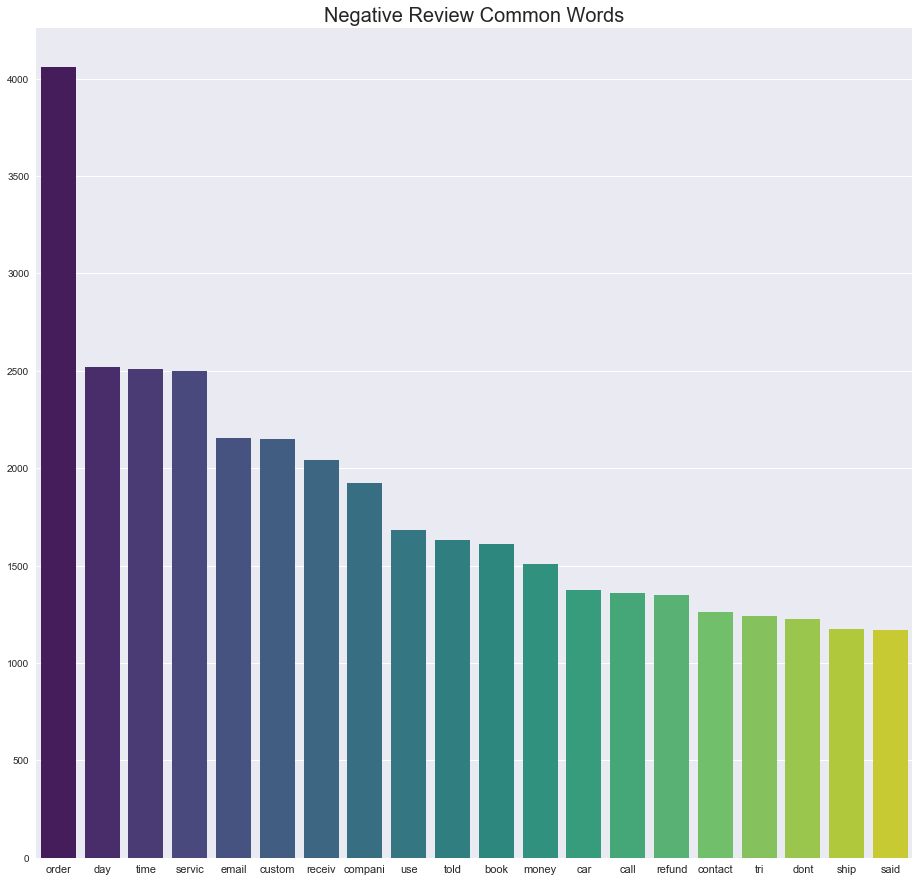

In [18]:
# plot 20 most common words in negative reviews
sns.barplot(neg_common_words, neg_common_counts, palette='viridis')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Negative Review Common Words', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=11)
#fig.savefig('positive_words.png')
sns.set(rc={'figure.figsize':(15.7,15.27)})
plt.show()

#### Evaluation Metric

In [8]:
def custom_metric(y_true, y_predict):
    from sklearn.metrics import confusion_matrix
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'    
    tn, fp, fn, tp = confusion_matrix(y_true, y_predict).ravel()
    MCC = ((tp * tn) - (fp * fn))/np.sqrt(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
    print(f'The model had a MCC score of {MCC}')
    return None

### Benchmark Model

In [9]:
corpus_sklearn = []
stemmer = PorterStemmer()

bench_reviews = df_reviews_clean['text'].str.lower()
stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

for doc in bench_reviews:
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stop_words]
    corpus_sklearn.append(' '.join(words_clean))

DTM_benchmodel = CountVectorizer(stop_words = stop_words, min_df=5, max_df=0.25, ngram_range=(1,3), max_features = 5000)
DTM_bench = DTM_benchmodel.fit_transform(corpus_sklearn)
df_DTM_bench = pd.DataFrame(DTM_bench.toarray(), columns=DTM_benchmodel.get_feature_names())
print(df_DTM_bench.shape)
df_DTM_bench.head()

(39726, 5000)


,abil,abl,abl answer,abl book,abl help,abl make,abl use,abroad,absolut,absolut love,...,youtub,youv,yr,zealand,zeer,zero,ziffit,zip,zone,zu
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

bench_train, bench_test  = train_test_split(df_DTM_bench,test_size=0.3,random_state=7,stratify=df_reviews_clean['reviews'])

bench_train_y = df_reviews_clean.loc[bench_train.index]['reviews']
bench_test_y = df_reviews_clean.loc[bench_test.index]['reviews']
                                            
benchf_NB = MultinomialNB()
benchf_NB.fit(bench_train,bench_train_y)
bench_pred_NB = benchf_NB.predict(bench_test)
custom_metric(bench_test_y, bench_pred_NB)

The model had a MCC score of 0.7538444324633028


### Some More Data Preocessing

In [9]:
CONTRACTION_MAP = {"ain't": "is not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because",\
                   "could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not",\
                   "doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not",\
                   "haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he he will have",\
                   "he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is","I'd": "I would",\
                   "I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would",\
                   "i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not",\
                   "it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us",\
                   "ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have",\
                   "must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have",\
                   "o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",\
                   "shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have",\
                   "she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have",\
                   "so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is","there'd": "there would",\
                   "there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have","they'll": "they will",\
                   "they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we would",\
                   "we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not",\
                   "what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have",\
                   "when's": "when is","when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will",\
                   "who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have",\
                   "won't": "will not","won't've": "will not have","would've": "would have","wouldn't": "would not","wouldn't've": "would not have",\
                   "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",\
                   "you'd": "you would","you'd've": "you would have","you'll": "you will","you'll've": "you will have","you're": "you are","you've": "you have"
                  }

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    import re
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    text = ' '.join([lemmatizer.lemmatize(word, pos = 'a') for word in text.split()])
    return text

def remove_special_characters_n(text, remove_digits=False):
    text = text.lower()
    text = re.sub('\w*\d\w*', '', text) #Removing words that have numbers in them
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    pattern = r'[''""..._]' #Removing punctuations and underscores
    text = re.sub(pattern, '', text)
    text = re.sub(r'(.)\1+', r'\1\1', text)   #Removing characters that appear more than twice
    return text

In [10]:
expand = lambda x: expand_contractions(x)
df_reviews_clean = pd.DataFrame(df_reviews_clean.text.apply(expand))

In [11]:
r_special = lambda x: remove_special_characters_n(x, remove_digits = True)
df_reviews_clean = pd.DataFrame(df_reviews_clean.text.apply(r_special))

In [12]:
lemma = lambda x: lemmatize_text(x)
df_reviews_clean = pd.DataFrame(df_reviews_clean.text.apply(lemma))

In [13]:
# Common word removal
freq = pd.Series(' '.join(df_reviews_clean['text']).split()).value_counts()[:15]
freq = list(freq.index)
df_reviews_clean['text'] = df_reviews_clean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_reviews_clean.head()

,text
0,planet vapes what look able find quick easy fr...
1,love bras just make sure you know your measure...
2,ship super fast literally within hours place o...
3,order many time from doheny always receive imm...
4,order place just as expect when mistakenly ove...


In [14]:
# Rare words removal
freq = pd.Series(' '.join(df_reviews_clean['text']).split()).value_counts()[-50:]
freq = list(freq.index)
df_reviews_clean['text'] = df_reviews_clean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_reviews_clean.head()

,text
0,planet vapes what look able find quick easy fr...
1,love bras just make sure you know your measure...
2,ship super fast literally within hours place o...
3,order many time from doheny always receive imm...
4,order place just as expect when mistakenly ove...


In [17]:
#from textblob import TextBlob
#def correct_spelling(text):
#    blob = TextBlob(text)
#    text = str(blob.correct())
#    return text

#spell_check = lambda x: correct_spelling(x)
#df_reviews_clean = pd.DataFrame(df_reviews_clean.text.apply(spell_check))


#def translate_text(text):
#    gs = goslate.Goslate()
#    translatedText = ' '.join([gs.translate(word,'en') for word in text.split()])
#    return translatedText

#translate = lambda x: translate_text(x)
#df_reviews_clean = pd.DataFrame(df_reviews_clean.text.apply(translate))

#### Some Fetaure Engineering

In [15]:
df_reviews_clean['reviews'] = df_reviews['reviews']
df_reviews_clean.head()
print(df_reviews_clean.shape)
df_reviews_clean.head()

(39726, 2)


,text,reviews
0,planet vapes what look able find quick easy fr...,1
1,love bras just make sure you know your measure...,1
2,ship super fast literally within hours place o...,1
3,order many time from doheny always receive imm...,1
4,order place just as expect when mistakenly ove...,1


In [16]:
df_reviews_clean['word_count'] = df_reviews_clean['text'].apply(lambda x: len(str(x).split(" ")))
df_reviews_clean.head()

,text,reviews,word_count
0,planet vapes what look able find quick easy fr...,1,11
1,love bras just make sure you know your measure...,1,13
2,ship super fast literally within hours place o...,1,19
3,order many time from doheny always receive imm...,1,21
4,order place just as expect when mistakenly ove...,1,30


In [17]:
def avg_word(sentence):
    words = sentence.split()
    if len(words) > 0:
        return (sum(len(word) for word in words)/len(words))
    else:
        return 0

df_reviews_clean['avg_word'] = df_reviews_clean['text'].apply(lambda x: avg_word(x))
df_reviews_clean.head()

,text,reviews,word_count,avg_word
0,planet vapes what look able find quick easy fr...,1,11,4.454545
1,love bras just make sure you know your measure...,1,13,4.538462
2,ship super fast literally within hours place o...,1,19,5.210526
3,order many time from doheny always receive imm...,1,21,5.571429
4,order place just as expect when mistakenly ove...,1,30,5.366667


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_reviews_clean[col])),columns=[col])
    return df

In [19]:
scaled_df = scaleColumns(df_reviews_clean,['word_count','avg_word'])
print(scaled_df.shape)
scaled_df.head()

(39726, 4)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,text,reviews,word_count,avg_word
0,planet vapes what look able find quick easy fr...,1,0.008292,0.101240
1,love bras just make sure you know your measure...,1,0.009950,0.103147
2,ship super fast literally within hours place o...,1,0.014925,0.118421
3,order many time from doheny always receive imm...,1,0.016584,0.126623
4,order place just as expect when mistakenly ove...,1,0.024046,0.121970


#### TF-IDF Vectorizer

In [23]:
corpus_sklearn = []

reviews = scaled_df['text'].str.lower()
stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

for doc in reviews:
    words = doc.split(' ')
    words_clean = [word for word in words if word not in stop_words]
    corpus_sklearn.append(' '.join(words_clean))

DTM_model = TfidfVectorizer(use_idf=True, min_df=5, max_df=0.50, ngram_range=(1,3), sublinear_tf=True,  stop_words= stop_words, max_features = 10000)
DTM = DTM_model.fit_transform(corpus_sklearn)
df_DTM = pd.DataFrame(DTM.toarray(), columns=DTM_model.get_feature_names())
print(df_DTM.shape)
df_DTM.head()

(39726, 10000)


,aag,aaron,ability,able,able answer,able answer question,able book,able book flight,able buy,able cancel,...,zero,zero issue,ziffit,zip,ziprecruiter,zodee,zone,zu,zufrieden,zum
0,0.0,0.0,0.0,0.232881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_DTM = pd.concat([df_DTM,scaled_df[['word_count','avg_word']]],axis=1)
df_DTM.shape

(39726, 10002)

In [26]:
train, test  = train_test_split(df_DTM,test_size=0.3,random_state=7,stratify=df_reviews_clean['reviews'])

train_y = df_reviews_clean.loc[train.index]['reviews']
test_y = df_reviews_clean.loc[test.index]['reviews']

print(train.shape)
print(train_y.shape)
print(test.shape)
print(test_y.shape)

(27808, 10002)
(27808,)
(11918, 10002)
(11918,)


In [28]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(C=1.0, dual=False, penalty='l1', solver='liblinear')
clf_log.fit(train,train_y)
clf_log_pred = clf_log.predict(test)
custom_metric(test_y, clf_log_pred)

The model had a MCC score of 0.7597828138289763


#### Trying CountVectorizer instead TF-IDF Vectorizer

In [29]:
corpus_sklearn_1 = []

reviews1 = scaled_df['text'].str.lower()
stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

for doc in reviews1:
    words = doc.split(' ')
    words_clean = [word for word in words if word not in stop_words]
    corpus_sklearn_1.append(' '.join(words_clean))

DTM_model_1 = CountVectorizer(stop_words = stop_words, min_df=5, max_df=0.50, ngram_range=(1,3), max_features = 10000)
DTM_1 = DTM_model_1.fit_transform(corpus_sklearn_1)
df_DTM_1 = pd.DataFrame(DTM_1.toarray(), columns=DTM_model_1.get_feature_names())
print(df_DTM_1.shape)
df_DTM_1.head()

(39726, 10000)


,aag,aaron,ability,able,able answer,able answer question,able book,able book flight,able buy,able cancel,...,zero,zero issue,ziffit,zip,ziprecruiter,zodee,zone,zu,zufrieden,zum
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train_1, test_1  = train_test_split(df_DTM_1,test_size=0.3,random_state=7,stratify=df_reviews_clean['reviews'])

train_y_1 = df_reviews_clean.loc[train_1.index]['reviews']
test_y_1 = df_reviews_clean.loc[test_1.index]['reviews']

print(train_1.shape)
print(train_y_1.shape)
print(test_1.shape)
print(test_y_1.shape)
gc.collect()

(27808, 10000)
(27808,)
(11918, 10000)
(11918,)


1592

In [31]:
from sklearn.linear_model import LogisticRegression

clf_log_1 = LogisticRegression(C=1.0, dual=False, penalty='l1', solver='liblinear')
clf_log_1.fit(train_1,train_y_1)
clf_log_pred_1 = clf_log_1.predict(test_1)
custom_metric(test_y_1, clf_log_pred_1)

The model had a MCC score of 0.7636873006338093


In [45]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(train,train_y)
clf_xgb_pred = clf_xgb.predict(test)
custom_metric(test_y, clf_xgb_pred)

The model had a MCC score of 0.612930625452866


In [121]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(max_iter=1000)
clf_SGD.fit(train,train_y;)
clf_SGD_pred = clf_SGD.predict(test)
custom_metric(test_y, clf_SGD_pred)

The model had a MCC score of 0.7646220729867401 and a f1_score of 0.9602844693744679


#### As we can see that, if you clean and process the data efficiently, even a benchmark simple model performance can come closer to machine learning advance model. Need to try now with Deep learning model and lets see the result

In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

np.random.seed(7)

In [21]:
corpus_sklearn = []

reviews = scaled_df['text'].str.lower()
stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

for doc in reviews:
    words = doc.split(' ')
    words_clean = [word for word in words if word not in stop_words]
    corpus_sklearn.append(' '.join(words_clean))

In [24]:
MAX_NB_WORDS = 10000
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(corpus_sklearn)
sequences = tokenizer.texts_to_sequences(corpus_sklearn)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32355 unique tokens.


In [27]:
MAX_SEQUENCE_LENGTH = 1000
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = scaled_df['reviews']
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (39726, 1000)
Shape of label tensor: (39726,)


In [30]:
# split the data into a training set and a validation set
validation_split=0.30
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(validation_split * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_test = data[-nb_validation_samples:]
y_test = labels[-nb_validation_samples:]

In [36]:
batch_size = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 27809 samples, validate on 11917 samples
Epoch 1/4
27809/27809 [==============================] - 2159s 78ms/step - loss: 0.2208 - acc: 0.9179 - val_loss: 0.1710 - val_acc: 0.9350
Epoch 2/4
27809/27809 [==============================] - 1448s 52ms/step - loss: 0.1374 - acc: 0.9522 - val_loss: 0.1654 - val_acc: 0.9379
Epoch 3/4
27809/27809 [==============================] - 1439s 52ms/step - loss: 0.1074 - acc: 0.9640 - val_loss: 0.1794 - val_acc: 0.9351
Epoch 4/4
27809/27809 [==============================] - 1740s 63ms/step - loss: 0.0845 - acc: 0.9714 - val_loss: 0.2189 - val_acc: 0.9330


In [47]:
y_pred_class = model.predict_classes(x_test)
custom_metric(y_test, y_pred_class)

The model had a MCC score of 0.7708957009179382
